In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Cardiotocographic.csv')

In [3]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


# 1.Data Cleaning & Preparation

In [4]:
df.shape

(2126, 14)

In [5]:
df.size

29764

In [6]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [7]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


### Missing Values

In [8]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [9]:
df[df.isnull().all(axis=1)]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP


In [10]:
df[df.isnull().any(axis=1)]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
50,NaN,NaN,0.000000,0.008086,0.000000,NaN,NaN,29.000000,1.300000,0.000000,NaN,NaN,NaN,NaN
116,NaN,0.038567,0.000000,0.006993,0.002331,NaN,NaN,26.000000,4.300000,0.532872,NaN,NaN,NaN,NaN
126,NaN,NaN,0.000000,0.004380,0.000000,NaN,NaN,69.000000,0.300000,21.000000,NaN,NaN,NaN,NaN
201,NaN,NaN,0.016393,0.000000,0.000000,NaN,NaN,56.000000,0.500000,12.000000,NaN,NaN,NaN,NaN
566,NaN,NaN,0.000000,0.004115,0.005487,NaN,NaN,43.000000,2.500000,0.000000,NaN,NaN,NaN,NaN
574,NaN,NaN,0.000000,0.002611,0.002611,NaN,NaN,34.000000,4.900000,0.000000,NaN,NaN,NaN,NaN
603,NaN,NaN,0.006519,0.001304,0.001304,NaN,NaN,73.000000,0.700000,0.000000,NaN,NaN,NaN,NaN
935,NaN,NaN,0.000000,0.005495,0.001374,NaN,NaN,30.000000,1.251793,0.000000,NaN,NaN,NaN,NaN
936,NaN,NaN,0.000000,0.007802,0.000000,NaN,NaN,33.000000,1.000000,0.000000,NaN,NaN,NaN,NaN
1013,NaN,NaN,0.000000,0.003861,0.000000,NaN,NaN,34.000000,1.000000,0.000000,NaN,NaN,NaN,NaN


In [11]:
mean=df['LB'].mean()
mean

133.3435983550352

In [12]:
df.fillna(df.mean(),inplace=True)

### Dupilactes

In [13]:
df.duplicated().sum()

2

In [14]:
df[df.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

### Remove Outliers

In [17]:
def remove_outliers(df):
    outliers_indices=[]
    for column in df.columns:
        Q1=df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR=Q3-Q1
        upper_extreme=Q3+1.5*IQR
        lower_extreme=Q1-1.5*IQR
        column_outliers=df[(df[column]<lower_extreme)|(df[column]>upper_extreme)].index
        outliers_indices.extend(column_outliers)
    outliers_indices=list(set(outliers_indices))
    df_no_outliers=df.drop(outliers_indices)
    return df_no_outliers

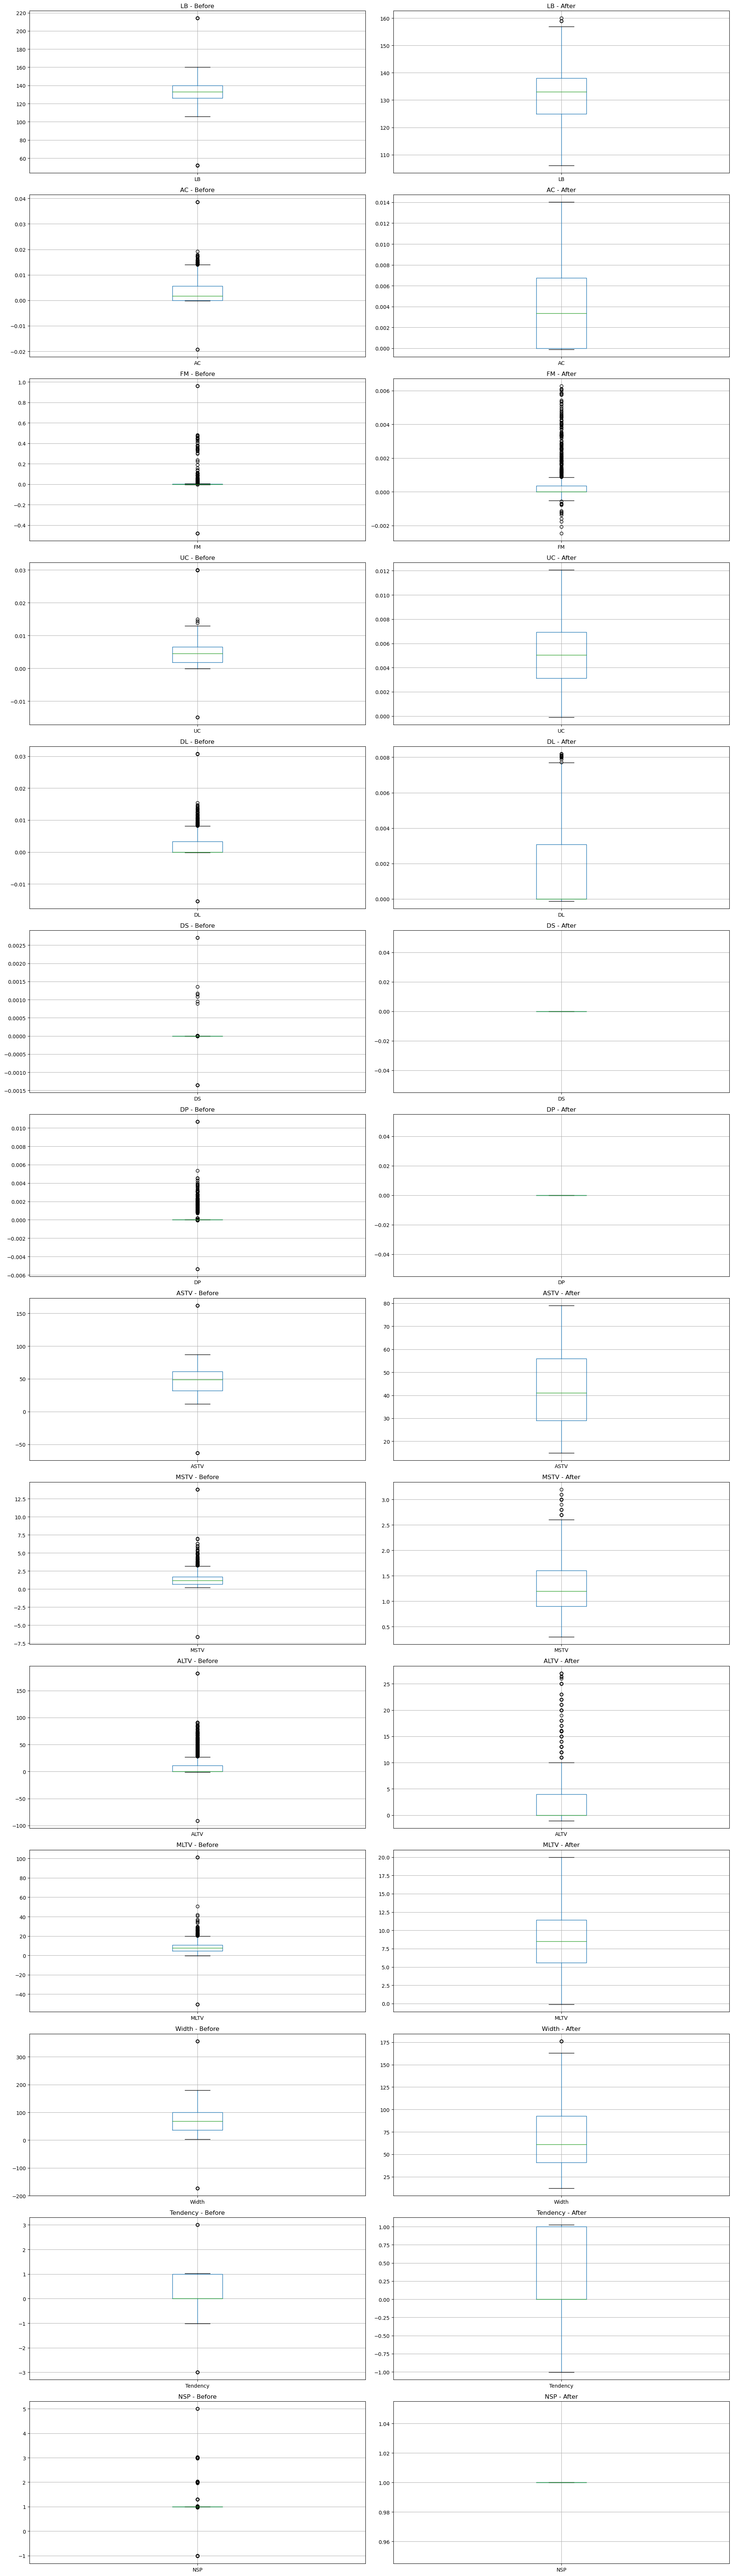

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
num_vars = len(df.columns)
plt.figure(figsize=(20, 5 * num_vars))
for i, column in enumerate(df.columns):
    plt.subplot(num_vars, 2, 2*i + 1)
    df.boxplot(column=[column])
    plt.title(f"{column} - Before")
df_no_outliers = remove_outliers(df)
for i, column in enumerate(df_no_outliers.columns):
    plt.subplot(num_vars, 2, 2*i + 2)
    df_no_outliers.boxplot(column=[column])
    plt.title(f"{column} - After")
plt.tight_layout()
plt.show()


In [19]:
df_no_outliers.shape

(882, 14)

In [20]:
df1=df_no_outliers
df1

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1,132.000000,0.006380,0.00000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.00000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
4,131.948232,0.006515,0.00000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
37,114.000000,0.004559,0.00000,0.004559,0.003040,0.0,0.0,24.0,3.2,0.000000,16.2,134.0,0.000000,1.0
59,144.000000,0.008143,0.00000,0.006595,0.000000,0.0,0.0,33.0,1.1,-0.060411,6.2,100.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,136.000000,0.000000,0.00207,0.008282,0.000000,0.0,0.0,67.0,1.5,11.000000,4.7,38.0,0.000000,1.0
2117,140.000000,0.000000,0.00000,0.007812,0.000000,0.0,0.0,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
2118,140.000000,0.000000,0.00000,0.006470,0.000898,0.0,0.0,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
2119,140.000000,0.000000,0.00000,0.006764,0.001127,0.0,0.0,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0


# 2.Statistical Summary

In [21]:
df1.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.0,882.0,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.0
mean,131.832238,0.004086,0.000604,0.004964,0.001547,0.0,0.0,42.408518,1.271222,3.173665,8.595051,67.848789,0.339055,1.0
std,9.445376,0.003741,0.001337,0.002714,0.002218,0.0,0.0,15.081768,0.538286,6.038688,4.492513,32.596982,0.589054,0.0
min,106.000000,-0.000122,-0.002467,-0.000101,-0.000124,0.0,0.0,15.000000,0.300000,-1.043619,-0.136053,12.000000,-1.006614,1.0
25%,125.000000,0.000000,0.000000,0.003136,0.000000,0.0,0.0,29.000000,0.900000,0.000000,5.600000,41.000000,0.000000,1.0
50%,133.000000,0.003354,0.000000,0.005056,0.000000,0.0,0.0,41.000000,1.200000,0.000000,8.500000,61.000000,0.000000,1.0
75%,138.000000,0.006740,0.000349,0.006932,0.003085,0.0,0.0,56.000000,1.600000,4.000000,11.400000,92.612277,1.000000,1.0
max,160.000000,0.014024,0.006272,0.012072,0.008197,0.0,0.0,79.000000,3.200000,27.000000,20.000000,176.310998,1.023635,1.0


In [22]:
stats = {}
for column in df1:
    stats[column] = {
        'Mean': df1[column].mean(),
        'Median': df1[column].median(),
        'Mode': df1[column].mode()[0],
        'STD': df1[column].std()
    }
for column, values in stats.items():
    print(f"\n{column}:")
    for stat, value in values.items():
        print(f"{stat}: {value:.2f}")


LB:
Mean: 131.83
Median: 133.00
Mode: 122.00
STD: 9.45

AC:
Mean: 0.00
Median: 0.00
Mode: 0.00
STD: 0.00

FM:
Mean: 0.00
Median: 0.00
Mode: 0.00
STD: 0.00

UC:
Mean: 0.00
Median: 0.01
Mode: 0.00
STD: 0.00

DL:
Mean: 0.00
Median: 0.00
Mode: 0.00
STD: 0.00

DS:
Mean: 0.00
Median: 0.00
Mode: 0.00
STD: 0.00

DP:
Mean: 0.00
Median: 0.00
Mode: 0.00
STD: 0.00

ASTV:
Mean: 42.41
Median: 41.00
Mode: 58.00
STD: 15.08

MSTV:
Mean: 1.27
Median: 1.20
Mode: 0.90
STD: 0.54

ALTV:
Mean: 3.17
Median: 0.00
Mode: 0.00
STD: 6.04

MLTV:
Mean: 8.60
Median: 8.50
Mode: 0.00
STD: 4.49

Width:
Mean: 67.85
Median: 61.00
Mode: 39.00
STD: 32.60

Tendency:
Mean: 0.34
Median: 0.00
Mode: 0.00
STD: 0.59

NSP:
Mean: 1.00
Median: 1.00
Mode: 1.00
STD: 0.00


#### Summary:

# LB (FHR baseline):
* Mean: 131.83, Median: 133.00
* The mode is at 122.00, indicating that this value occurred most frequently.
* Standard deviation (STD) is 9.45, indicating moderate variability around the mean.
##### AC (accelerations):
* All values are 0, indicating that there might be missing or incorrect data for this variable.
##### FM (fetal movements):
* Similar to AC, all values are 0, indicating potential issues with the data.
##### DC, DL, DP UC
* For all these variables, the mean, median, and mode are very close to zero. Additionally, the standard deviation is also zero. This indicates that these variables might have a majority of zero values
##### ASTV (percentage of time with abnormal short-term variability):
* Mean: 42.41, Median: 41.00
* The mode is at 58.00, indicating a peak occurrence at this value.
* STD is 15.08, suggesting considerable variability in short-term variability percentages.
##### MSTV (mean value of short-term variability):
* Mean: 1.27, Median: 1.20
* The mode is at 0.90, indicating a frequent occurrence of this value.
* STD is 0.54, indicating moderate variability in short-term variability.
##### ALTV (percentage of time with abnormal long-term variability):
* Mean: 3.17, Median: 0.00
* The mode is at 0.00, suggesting that most values are 0.
* STD is 6.04, indicating significant variability, potentially due to a large number of 0 values.
##### MLTV (mean value of long-term variability):
* Mean: 8.60, Median: 8.50
* The mode is at 0.00, indicating a peak occurrence at this value.
* STD is 4.49, indicating moderate variability in long-term variability.
##### Width (width of FHR histogram):
* Mean: 67.85, Median: 61.00
* The mode is at 39.00, indicating a frequent occurrence of this value.
* STD is 32.60, suggesting considerable variability in FHR histogram widths.
##### Tendency (histogram's tendency):
* Mean: 0.34, Median: 0.00
* The mode is at 0.00, indicating a peak occurrence at this value.
* STD is 0.59, suggesting variability in the histogram's tendency.
##### NSP (fetal state class code):
* Mean, Median, and Mode are all 1.00, indicating that the dataset may be skewed towards one class.
* STD is 0.00, indicating no variability, which seems unlikely and might require further investigation.
##### Conclusion
* These findings provide valuable insights into the distribution and characteristics of each variable in the dataset

# 3.Data Visualization

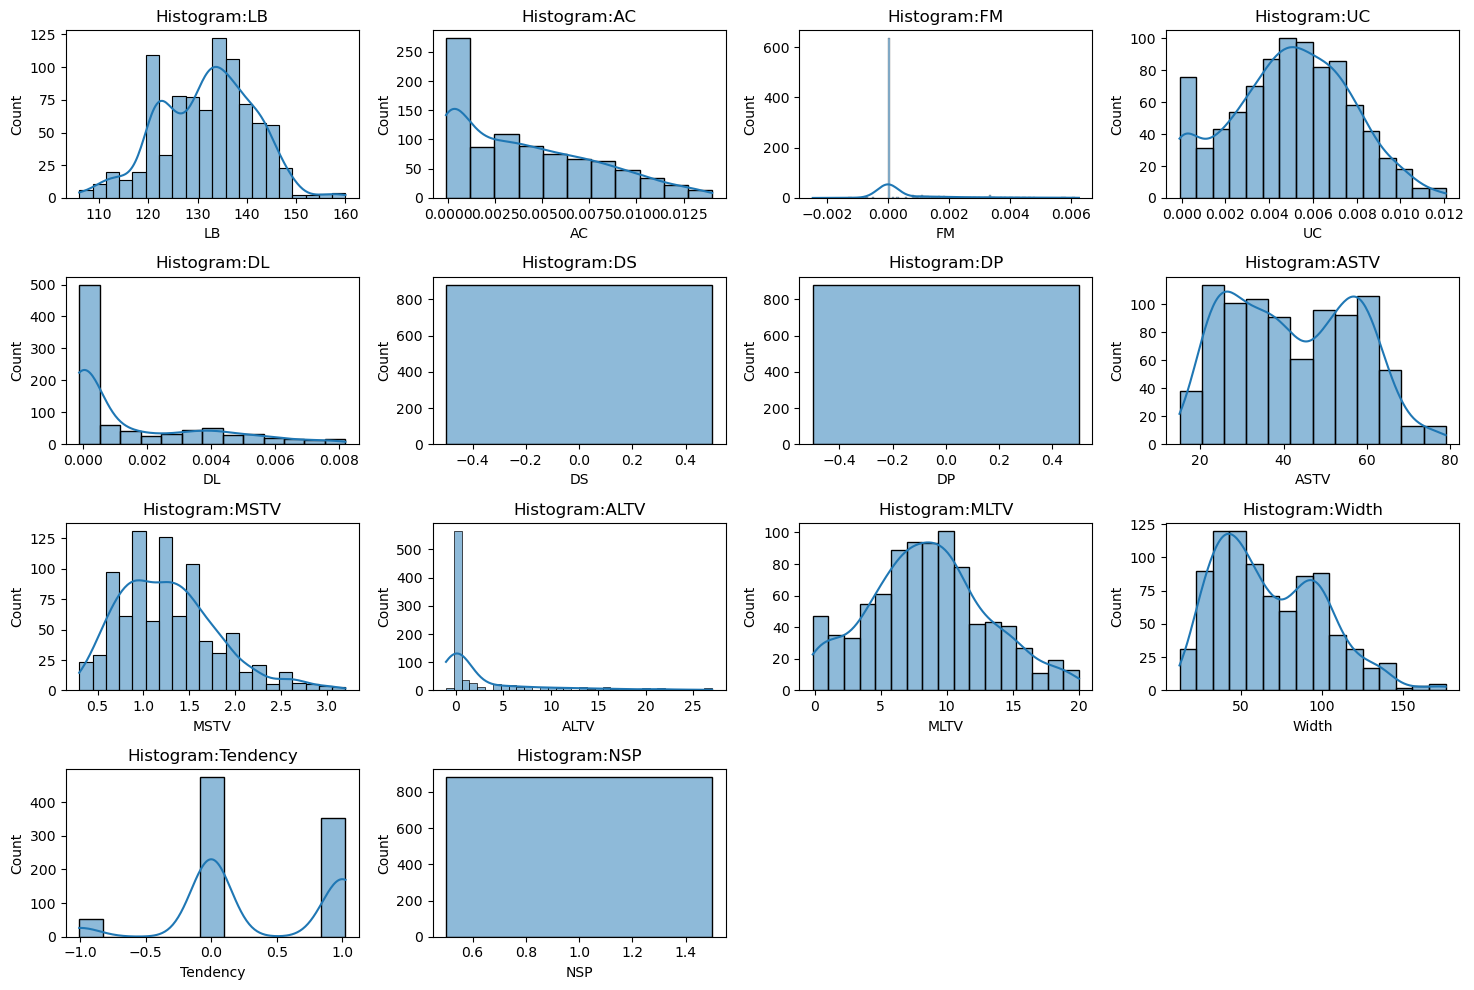

In [23]:
plt.figure(figsize=(15,10))
for i,column in enumerate(df1.columns):
    plt.subplot(4,4,i+1)
    if df1[column].dtype=='float64' or df1[column].dtype=='int64':  #Numerical variables
        sns.histplot(df1[column],kde=True)  #Histogram
        plt.title(f'Histogram:{column}')
    elif df1[column].dtype=='object': #Categorical variables
        sns.countplot(x=df1[column],order=df1[column].value_counts().index)
        plt.title(f'Count Plot:{column}')
    else:
        print(f"Unsupported data type for column:{column}")
plt.tight_layout()
plt.show()

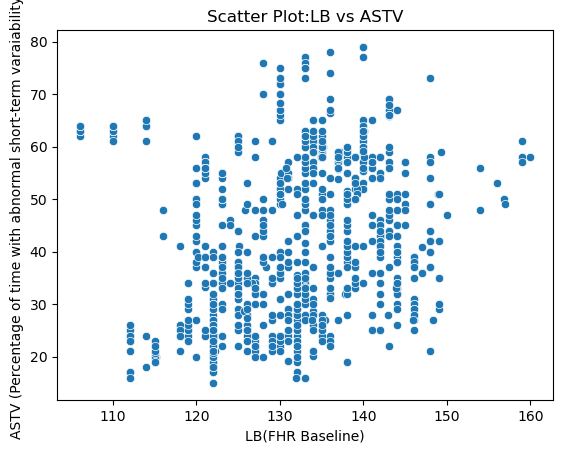

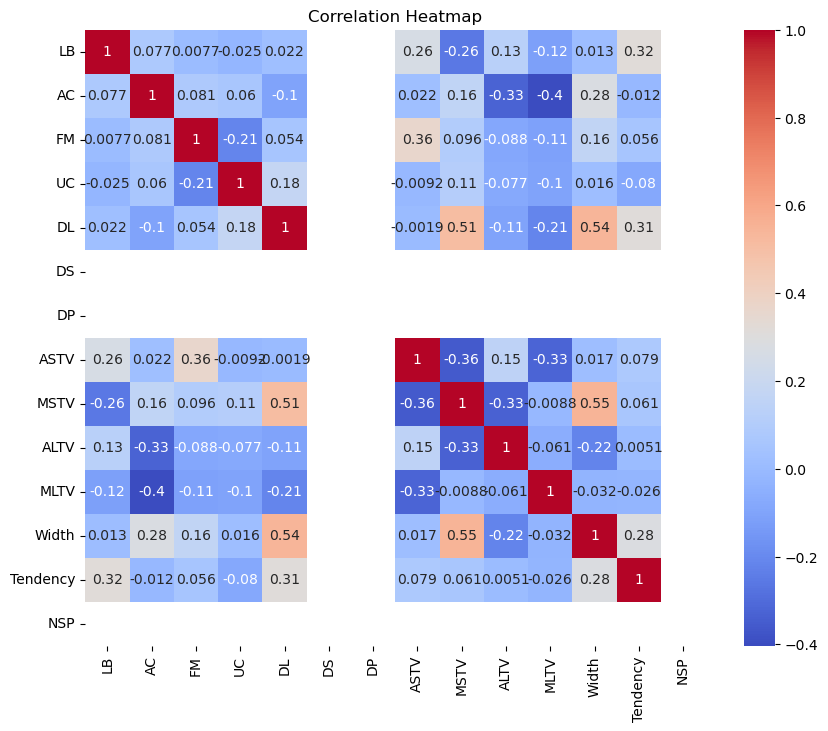

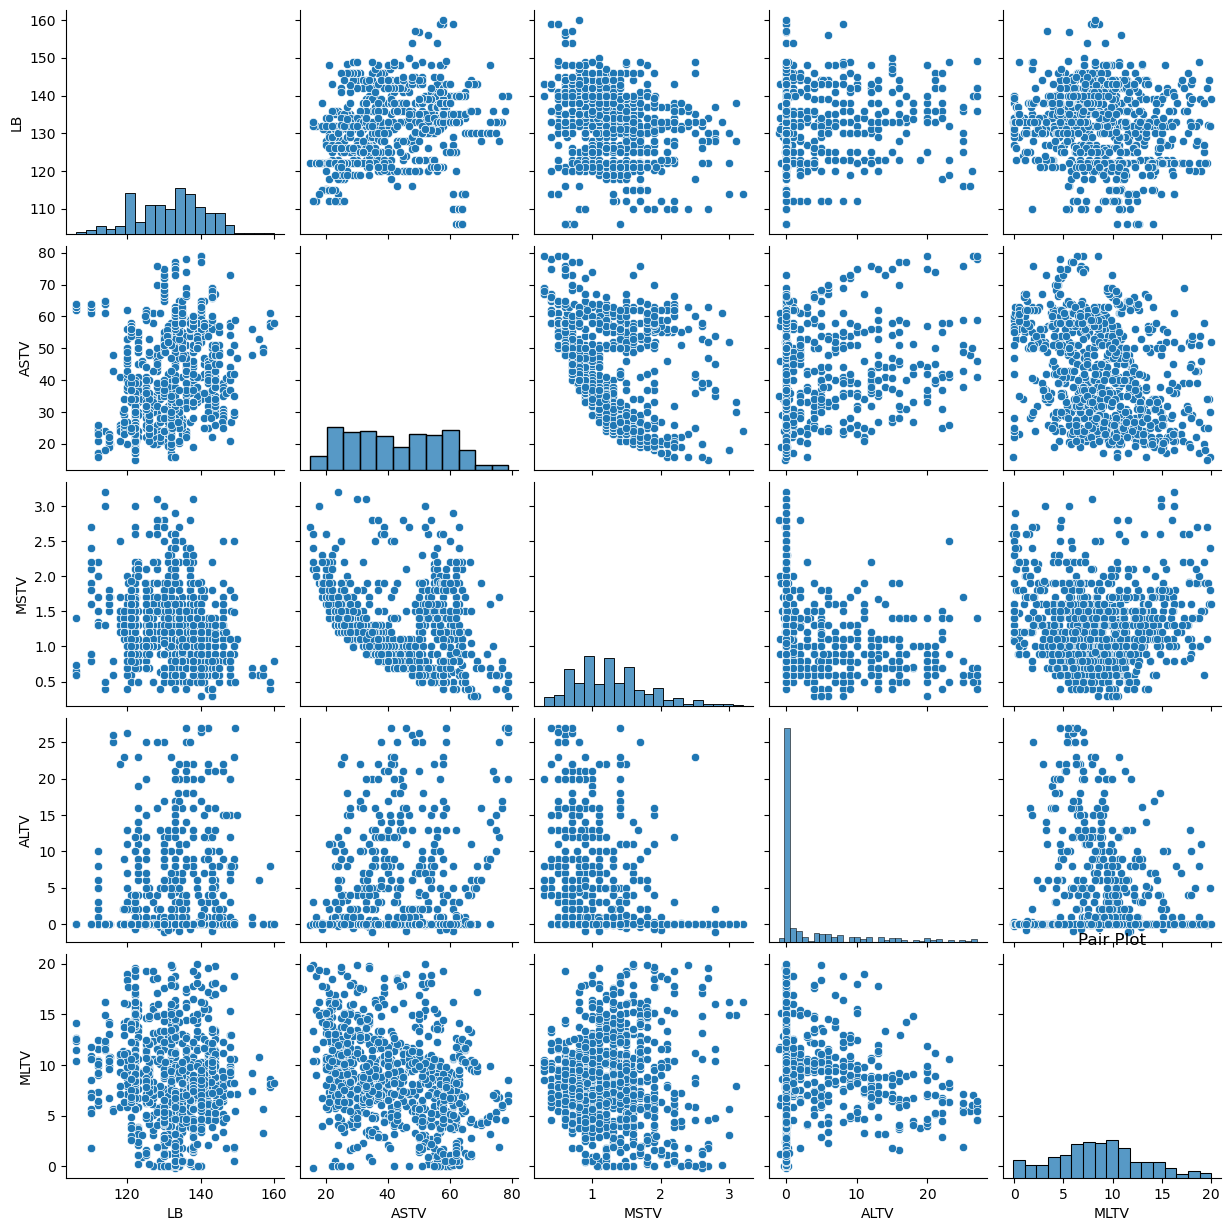

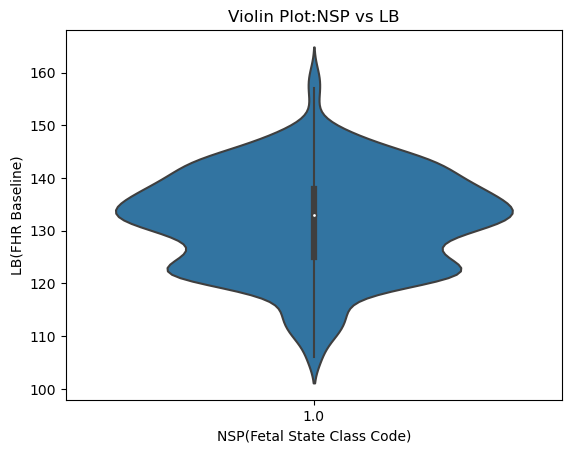

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot
sns.scatterplot(x='LB',y='ASTV',data=df1)
plt.title('Scatter Plot:LB vs ASTV')
plt.xlabel('LB(FHR Baseline)')
plt.ylabel('ASTV (Percentage of time with abnormal short-term varaiability)')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,8))
corr_matrix=df1.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pair Plot
sns.pairplot(df1[['LB','ASTV','MSTV','ALTV','MLTV']])
plt.title('Pair Plot')
plt.show()

# Violin Plot
sns.violinplot(x='NSP',y='LB',data=df1)
plt.title('Violin Plot:NSP vs LB')
plt.xlabel('NSP(Fetal State Class Code)')
plt.ylabel('LB(FHR Baseline)')
plt.show()

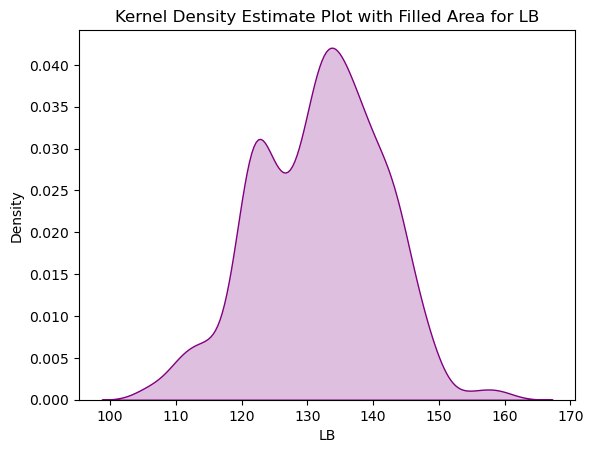

In [25]:
sns.kdeplot(data=df1,x='LB',color='purple',fill=True)
plt.title('Kernel Density Estimate Plot with Filled Area for LB')
plt.show()

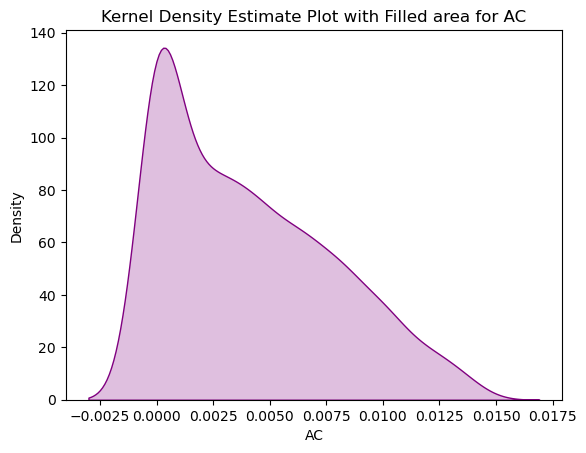

In [26]:
sns.kdeplot(data=df1,x='AC',color='purple',fill=True)
plt.title('Kernel Density Estimate Plot with Filled area for AC')
plt.show()

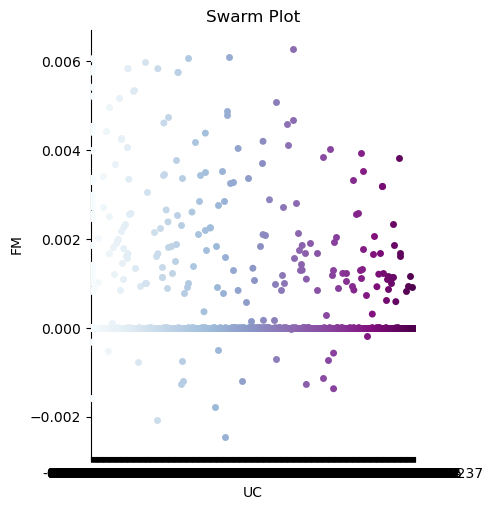

In [27]:
sns.catplot(data=df1,x='UC',y='FM',
           kind='swarm',palette='BuPu')
plt.title('Swarm Plot')
plt.show()

# 4.Pattern Recognition & Insights

In [28]:
correlation_matrix=df1.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000  0.077264  0.007735 -0.024767  0.021670 NaN NaN  0.263345   
AC        0.077264  1.000000  0.080739  0.060486 -0.104874 NaN NaN  0.021503   
FM        0.007735  0.080739  1.000000 -0.212933  0.053737 NaN NaN  0.362207   
UC       -0.024767  0.060486 -0.212933  1.000000  0.176550 NaN NaN -0.009235   
DL        0.021670 -0.104874  0.053737  0.176550  1.000000 NaN NaN -0.001862   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.263345  0.021503  0.362207 -0.009235 -0.001862 NaN NaN  1.000000   
MSTV     -0.257221  0.160198  0.096052  0.111119  0.507528 NaN NaN -0.356744   
ALTV      0.125870 -0.329411 -0.088116 -0.077042 -0.106786 NaN NaN  0.146303   
MLTV     -0.117146 -0.403243 -0.109841 -0.102200 -0.212297 NaN NaN -0.325747   
Width     0.012893  

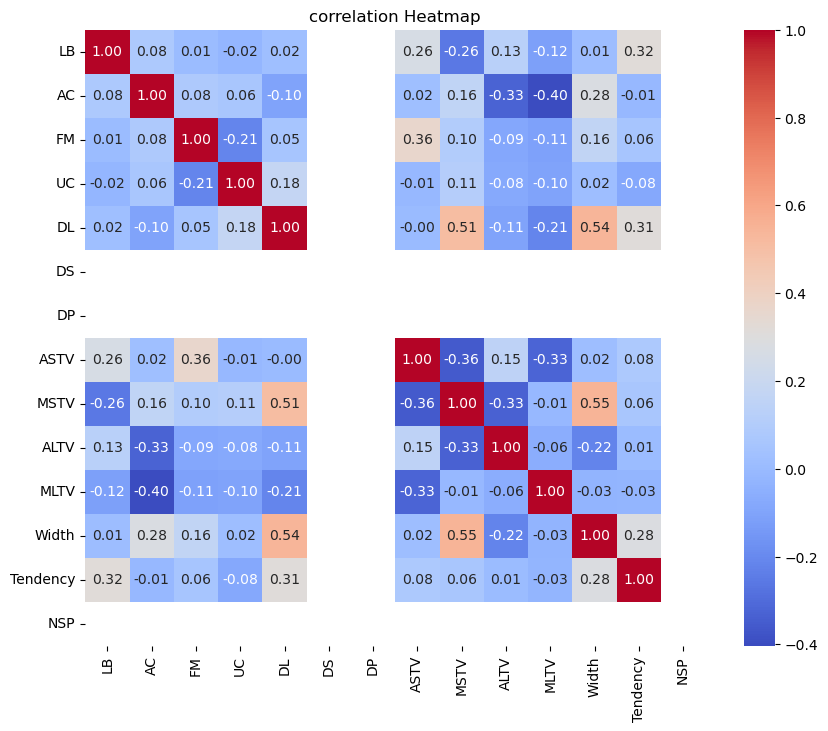

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("correlation Heatmap")
plt.show()

##### key observations:

* LB (FHR baseline) has a moderate positive correlation with ASTV (percentage of time with abnormal short-term variability) and Tendency. This suggests that as the FHR baseline increases, the percentage of abnormal short-term variability also tends to increase.
* LB has a moderate negative correlation with MSTV (mean value of short-term variability). This indicates that as the FHR baseline increases, the mean value of short-term variability tends to decrease.
* DL (percentage of time with abnormal long-term variability) has a strong positive correlation with Width (width of FHR histogram), suggesting that as the percentage of time with abnormal long-term variability increases, the width of the FHR histogram also tends to increase.
* DL also has a moderate positive correlation with LB and Tendency, indicating that these variables tend to increase together.
* ALTV (percentage of time with abnormal long-term variability) has a moderate negative correlation with AC (accelerations per second), MLTV (mean value of long-term variability), and Width. This suggests that as the percentage of time with abnormal long-term variability increases, the number of accelerations per second, the mean value of long-term variability, and the width of the FHR histogram tend to decrease.
* These correlations provide valuable insights into the relationships between different variables in the dataset, which can inform further analysis and decision-making processes. 

# 5.Conclusion

###### Through the exploratory analysis, several key insights and patterns have been uncovered:

* Variable Relationships: The correlation matrix revealed various relationships between different variables in the dataset. For example, LB (FHR baseline) showed correlations with other variables such as ASTV (percentage of time with abnormal short-term variability) and DL (percentage of time with abnormal long-term variability), indicating potential dependencies between these factors.
* Tendencies: The Tendency variable showed correlations with LB and DL, suggesting potential trends or patterns in fetal heart rate characteristics over time.
* Abnormal Variability: Variables related to abnormal short-term and long-term variability (ASTV, DL, ALTV) demonstrated correlations with other parameters, indicating potential associations between abnormal variability and other fetal heart rate characteristics.
* Impact on Decision-making: These findings could impact decision-making in various ways. For example:
* Healthcare professionals could use these insights to identify patterns or trends in fetal heart rate characteristics that may indicate fetal distress or other medical conditions.
* Researchers could use the identified relationships to develop predictive models for fetal health outcomes based on fetal heart rate monitoring data.
* Medical device manufacturers could use these insights to improve the design of fetal monitoring devices and algorithms for detecting abnormal patterns in fetal heart rate data.
* Further Analyses: Further analyses could include:
* Investigating the underlying causes of the observed relationships between variables.
* Exploring additional factors that may influence fetal heart rate characteristics, such as maternal health status or gestational age.
* Validating the findings through longitudinal studies or clinical trials.
* Overall, the insights gained from exploratory analysis provide valuable information for understanding fetal heart rate characteristics and their potential implications for fetal health monitoring and clinical decision-making. Further analyses and research are warranted to fully elucidate the complex relationships within the data and their clinical significance.






